# Задание (вариант №17).

Используя формулу прямоугольников, трапеции и Симпсона численно вычислить $ I = \int_a^b f(x) dx $ на отрезке $ [a, b] $ в узлах сетки.

Исследовать зависимость ошибки вычислений от шага сетки.

$$$$
$$ f(x) = \frac{1}{1 + \cos (\frac{x}{5})} $$
$$$$
$$ I = \int_a^b f(x) dx = 5 \tan (\frac{x}{10}) \approx 3.0933624961 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 1 / (1 + np.cos(x / 5))

def f_int(x):
    return 5 * np.tan(x / 10)

In [3]:
a, b = -3, 3
I = f_int(b) - f_int(a)
print(I)

def equispaced_points(h: float) -> np.ndarray:
    return np.linspace(a, b, int((b - a) / h) + 1)

steps = [3, 2, 1, 0.75, 0.5, 0.25, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]

3.0933624960962325


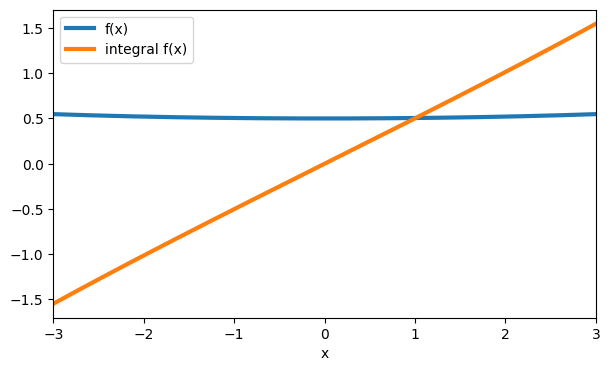

In [4]:
plt.figure(figsize=(7, 4))
plt.xlim(a, b)
plt.xlabel("x")

x = equispaced_points(0.01)

y = f(x)
plt.plot(x, y, linewidth=3, label="f(x)")

y_int = f_int(x)
plt.plot(x, y_int, linewidth=3, label="integral f(x)")

plt.legend()
plt.show()

In [5]:
def analyze(f, x: np.ndarray) -> float:
    return abs(I - f(x))

## Численное интегрирование

Попытка аппроксимации интеграла от функции площадями под графиком этой функции.

### Формула прямоугольников

Формула прямоугольников - аппроксимация интеграла **суммами Дарбу**.

Реализована формула левых прямоугольников:
$$ \int_a^b f(x) dx = \sum_{i=0}^{n-1} f(x_i) (x_{i+1} - x_{i}) $$

In [6]:
def rect_approx(x: np.ndarray) -> float:
    h = x[1] - x[0]
    y = f(x)
    return np.sum(y[:-1]) * h

In [7]:
errors_rect = []
for h in steps:
    errors_rect.append(analyze(rect_approx, equispaced_points(h)))
    print(errors_rect[-1])

0.05017087688758792
0.022460512071304173
0.005640366483462778
0.0031748099566177856
0.0014116969173758598
0.00035302501123224417
5.648852204442889e-05
3.177500560047619e-05
1.4122291982943125e-05
3.5305830805576477e-06
5.648936811653016e-07
3.177526877173875e-07
1.4122338676259005e-07
3.530579784083443e-08
5.64859714557997e-09


### Формула трапеции

Формула прямоугольников - аппроксимация интеграла трапециями вместо прямоугольников.

Формула:
$$ \int_a^b f(x) dx = \sum_{i=0}^{n-1} \frac{f(x_i) + f(x_{i+1})}{2} (x_{i+1} - x_i) $$

In [8]:
def trapezoid_approx(x: np.ndarray) -> float:
    h = x[1] - x[0]
    y = f(x)
    return (np.sum(y) - (y[0] + y[-1])/2) * h

In [9]:
errors_trapezoid = []
for h in steps:
    errors_trapezoid.append(analyze(trapezoid_approx, equispaced_points(h)))
    print(errors_trapezoid[-1])

0.05017087688758792
0.022460512071304617
0.005640366483462778
0.0031748099566177856
0.0014116969173758598
0.00035302501123224417
5.648852204442889e-05
3.177500560047619e-05
1.4122291982943125e-05
3.530583081001737e-06
5.648936811653016e-07
3.177526881614767e-07
1.4122338676259005e-07
3.530579784083443e-08
5.64859758966918e-09


### Формула Симпсона

Формула Симпсона - аппроксимация интеграла квадратичным полиномом.

Формула:
$$ \int_a^b f(x) dx = \sum_{i=0}^{n-2} (f(x_i) + 4f(x_{i+1}) + f(x_{i+2})) \frac{(x_{i+1} - x_i)}{3} $$

In [10]:
def simpson_approx(x: np.ndarray) -> float:
    h = x[1] - x[0]
    y = f(x)
    n = len(x)

    if n % 2 == 0:
        simpson_result = simpson_approx(x[:-1])
        trapezoid_result = (y[-2] + y[-1]) * h / 2
        return simpson_result + trapezoid_result

    result = y[0] + y[-1]
    result += 4 * np.sum(y[1:-1:2])
    result += 2 * np.sum(y[2:-1:2])
    return result * h / 3.0

In [11]:
errors_simpson = []
for h in steps:
    errors_simpson.append(analyze(simpson_approx, equispaced_points(h)))
    print(errors_simpson[-1])

0.002326419226314602
0.00819020058796216
3.3651287515645834e-05
1.0756074833473406e-05
2.1403953467391545e-06
1.343758513350224e-07
3.44437234289785e-09
1.0899414704113042e-09
2.1530066618424826e-10
1.3446577185050046e-11
2.779998453661392e-13
4.3076653355456074e-14
4.39648317751562e-14
6.483702463810914e-14
3.4061642395499803e-13


Зависимость погрешностей от шага

График получился не очень репрезентативным - он не совсем верно отражает порядок погрешность методов.

Функция симметрична и поэтому методы прямоугольника и трапеции эквивалентны, а реализация Симпсона требует использовать шаг $ 2h $ для соответствия сетке, что приводит к плохим результатам.

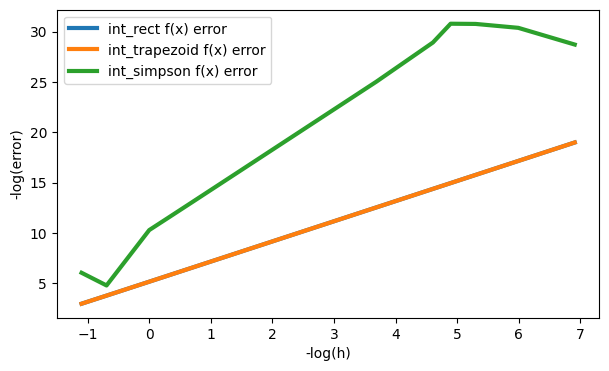

In [12]:
plt.figure(figsize=(7, 4))
plt.xlabel("-log(h)")
plt.ylabel("-log(error)")

log_steps = list(map(lambda x: -np.log(x), steps))
plt.plot(log_steps, list(map(lambda x: -np.log(x), errors_rect)), linewidth=3, label="int_rect f(x) error")
plt.plot(log_steps, list(map(lambda x: -np.log(x), errors_trapezoid)), linewidth=3, label="int_trapezoid f(x) error")
plt.plot(log_steps, list(map(lambda x: -np.log(x), errors_simpson)), linewidth=3, label="int_simpson f(x) error")

plt.legend()
plt.show()